# part2 resume w adding terms -------------->

# adding interaction & squared terms for better results in LR

In [10]:
import pandas as pd

In [11]:
#extract x&y
train_data = pd.read_csv('train_data.csv')
X_train_selected = train_data.drop(columns=['y1_train', 'y2_train'])
y1_train = train_data['y1_train']
y2_train = train_data['y2_train']

val_data = pd.read_csv('val_data.csv')
X_val_selected = val_data.drop(columns=['y1_val', 'y2_val'])
y1_val = val_data['y1_val']
y2_val = val_data['y2_val']

In [14]:
# X_train_selected
# X_val_selected
y2_train
# y2_val

0         1.479099
1         0.106667
2         3.496627
3         2.640833
4         0.000000
            ...   
348451    0.000000
348452    0.000000
348453    0.000000
348454    4.565225
348455    3.384869
Name: y2_train, Length: 348456, dtype: float64

In [18]:
#extract top 10 features from part1
X_train_selected_lr =X_train_selected.copy()
X_val_selected_lr = X_val_selected.copy()

top_features = X_train_selected_lr.columns
top_features

Index(['Ice vol mean radius, Mean (um)', 'Total contrail EF (J)',
       'Temp initial, Mean (K)', 'Tau cirrus, Mean',
       'Ice number initial, Mean (m-1)', 'RF SW (W m-2)', 'RF LW (W m-2)',
       'RHi initial, Mean', 'Initial contrail length (km)',
       'Mean nvPM number EI (kg-1)'],
      dtype='object')

In [19]:
#X input for LR - add iteraction & squared terms to address heteroscadasticity & non-linearity in LR 

#add interaction terms for top 10 features
for i, featureA in enumerate(top_features):
    for j, featureB in enumerate(top_features):
        if i < j:
            name = f"{featureA}_x_{featureB}"
            X_train_selected_lr[name] = X_train_selected_lr[featureA] * X_train_selected_lr[featureB]
            X_val_selected_lr[name] = X_val_selected_lr[featureA] * X_val_selected_lr[featureB]

#add squared terms for top 10 features
for feature in top_features:
    name = f"{feature}^2"
    X_train_selected_lr[name] = X_train_selected_lr[feature] ** 2
    X_val_selected_lr[name] = X_val_selected_lr[feature] ** 2

In [21]:
X_train_selected_lr

,"Ice vol mean radius, Mean (um)",Total contrail EF (J),"Temp initial, Mean (K)","Tau cirrus, Mean","Ice number initial, Mean (m-1)",RF SW (W m-2),RF LW (W m-2),"RHi initial, Mean",Initial contrail length (km),Mean nvPM number EI (kg-1),...,"Ice vol mean radius, Mean (um)^2",Total contrail EF (J)^2,"Temp initial, Mean (K)^2","Tau cirrus, Mean^2","Ice number initial, Mean (m-1)^2",RF SW (W m-2)^2,RF LW (W m-2)^2,"RHi initial, Mean^2",Initial contrail length (km)^2,Mean nvPM number EI (kg-1)^2
0,1.602929,-8.025636e+12,210.523169,0.037400,5.912681e+12,-2.699594,0.897311,0.940415,1730.598473,5.819433e+14,...,2.569380,6.441083e+25,44320.004514,0.001399,3.495980e+25,7.287805,0.805168,0.884381,2.994971e+06,3.386580e+29
1,1.159301,-1.739134e+09,214.869896,0.196300,1.551501e+12,-0.323543,0.193212,0.888609,2392.766875,1.257910e+15,...,1.343978,3.024586e+18,46169.072382,0.038534,2.407154e+24,0.104680,0.037331,0.789626,5.725333e+06,1.582339e+30
2,6.643867,1.100071e+14,212.043361,0.216766,3.567231e+12,-0.150079,1.620777,1.079139,1293.651246,7.832550e+14,...,44.140968,1.210155e+28,44962.386811,0.046988,1.272514e+25,0.022524,2.626919,1.164541,1.673534e+06,6.134884e+29
3,5.930651,1.662657e+13,212.897995,0.031672,4.446420e+12,-3.376934,4.142243,1.030119,877.101989,7.876681e+14,...,35.172625,2.764429e+26,45325.556173,0.001003,1.977065e+25,11.403680,17.158180,1.061144,7.693079e+05,6.204211e+29
4,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,993.379583,1.340011e+15,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.868030e+05,1.795629e+30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348451,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,734.381041,1.450147e+15,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.393155e+05,2.102927e+30
348452,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1669.866075,1.279889e+15,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.788453e+06,1.638115e+30
348453,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,599.246928,1.819401e+15,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.590969e+05,3.310222e+30
348454,8.914353,8.477492e+14,215.760118,0.179969,3.397830e+12,-1.553311,4.208072,1.105313,1572.834644,8.504530e+14,...,79.465683,7.186787e+29,46552.428642,0.032389,1.154525e+25,2.412776,17.707874,1.221717,2.473809e+06,7.232703e+29


# standardisation

In [20]:
#standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaled for RF
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)

#scaled for LR
X_train_scaled_lr = scaler.fit_transform(X_train_selected_lr)
X_val_scaled_lr = scaler.transform(X_val_selected_lr)

# modelling

## linear regression

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [25]:
#predict "Persistent contrail length (km)" - y1
reg1 = LinearRegression()
reg1.fit(X_train_scaled_lr, y1_train)
y1_pred = reg1.predict(X_val_scaled_lr)

r2_y1 = r2_score(y1_val, y1_pred)
mse_y1 = mean_squared_error(y1_val, y1_pred)

print(f"Performance for 'Persistent contrail length (km)':")
print(f"R2 Score: {r2_y1:.4f}")
print(f"Mean Squared Error: {mse_y1:.4f}\n")

Performance for 'Persistent contrail length (km)':
R2 Score: 0.7529
Mean Squared Error: 67882.1280



In [26]:
#predict "Contrail age, Mean (h)" - y2
reg2 = LinearRegression()
reg2.fit(X_train_scaled_lr, y2_train)
y2_pred = reg2.predict(X_val_scaled_lr)

r2_y2 = r2_score(y2_val, y2_pred)
mse_y2 = mean_squared_error(y2_val, y2_pred)

print(f"Performance for 'Contrail age, Mean (h)':")
print(f"R2 Score: {r2_y2:.4f}")
print(f"Mean Squared Error: {mse_y2:.4f}")

Performance for 'Contrail age, Mean (h)':
R2 Score: 0.8754
Mean Squared Error: 0.6734


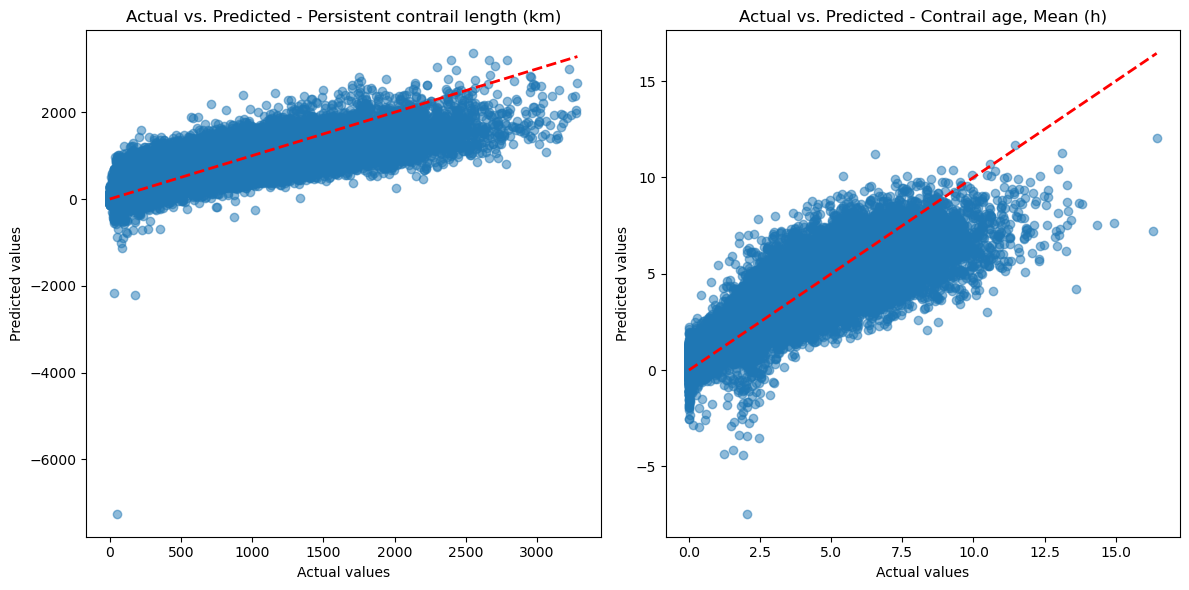

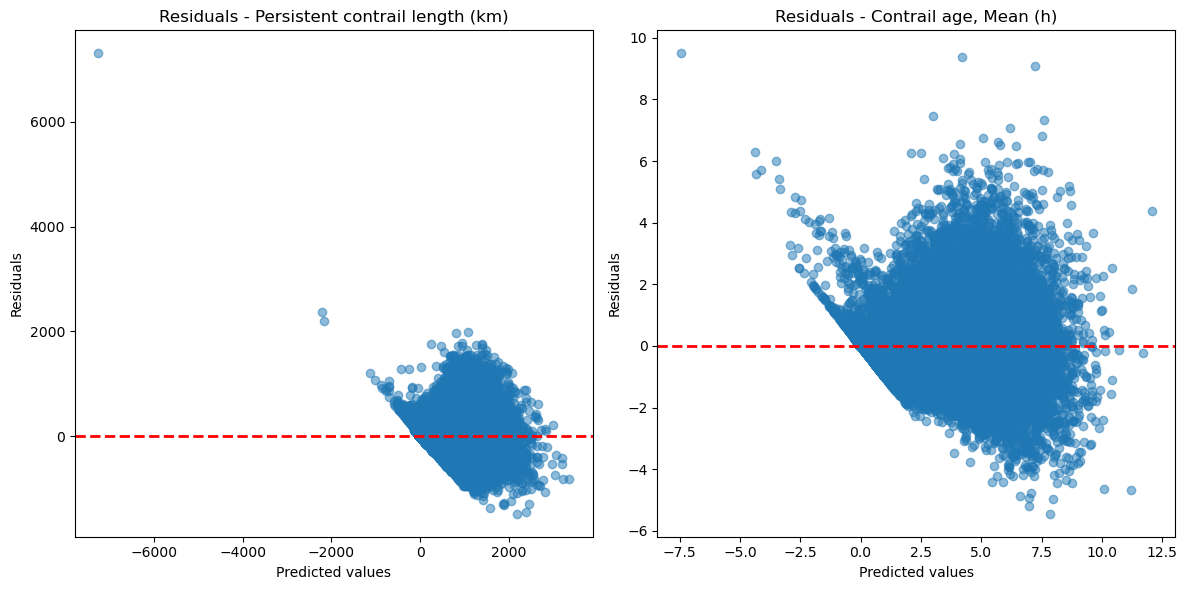

In [27]:
# 1. scatterplot of Actual vs. Predicted values
plt.figure(figsize=(12, 6))

#'Persistent contrail length (km)'
plt.subplot(1, 2, 1)
plt.scatter(y1_val, y1_pred, alpha=0.5)
plt.plot([min(y1_val), max(y1_val)], [min(y1_val), max(y1_val)], '--', lw=2, color='red')
plt.title("Actual vs. Predicted - Persistent contrail length (km)")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

#'Contrail age, Mean (h)'
plt.subplot(1, 2, 2)
plt.scatter(y2_val, y2_pred, alpha=0.5)
plt.plot([min(y2_val), max(y2_val)], [min(y2_val), max(y2_val)], '--', lw=2, color='red')
plt.title("Actual vs. Predicted - Contrail age, Mean (h)")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.tight_layout()
plt.show()

# 2. residualplots
plt.figure(figsize=(12, 6))

#'Persistent contrail length (km)'
plt.subplot(1, 2, 1)
residuals1 = y1_val - y1_pred
plt.scatter(y1_pred, residuals1, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("Residuals - Persistent contrail length (km)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

#'Contrail age, Mean (h)'
plt.subplot(1, 2, 2)
residuals2 = y2_val - y2_pred
plt.scatter(y2_pred, residuals2, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("Residuals - Contrail age, Mean (h)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

## random forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
# #'Persistent contrail length (km)' - y1
# rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
# rf1.fit(X_train_scaled, y1_train)
# y1_pred_rf = rf1.predict(X_val_scaled)

# #evaluate rf
# mse1_rf = mean_squared_error(y1_val, y1_pred_rf)
# r2_1_rf = r2_score(y1_val, y1_pred_rf)
# print(f"Random Forest Metrics for 'Persistent contrail length (km)': MSE = {mse1_rf}, R2 = {r2_1_rf}")

In [48]:
#gridsearch for y2 - interrupted too long!!!
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

#fit model
grid_search.fit(X_train_scaled, y2_train)

#extract best parameters & estimators
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 2.4min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 4.9min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time= 7.3min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time= 6.9min


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [49]:
#'Contrail age, Mean (h)' - y2 wo added terms - takes 30mins!!!!
# #predict using best model
# y2_pred_best_rf = best_rf.predict(X_val_scaled)

# #evaluate y2 best model
# mse2_best_rf = mean_squared_error(y2_val, y2_pred_best_rf)
# r2_2_best_rf = r2_score(y2_val, y2_pred_best_rf)
# print(f"Optimized RandomForest Metrics for 'Contrail age, Mean (h)': MSE = {mse2_best_rf}, R2 = {r2_2_best_rf}")
# print("Best parameters:", best_params)

rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(X_train_scaled, y2_train)  #- takes 30mins!!!!
y2_pred_rf = rf2.predict(X_val_scaled)

#evaluate rf
mse2_rf = mean_squared_error(y2_val, y2_pred_rf)
r2_2_rf = r2_score(y2_val, y2_pred_rf)
print(f"Random Forest Metrics for 'Persistent contrail length (km)': MSE = {mse2_rf}, R2 = {r2_2_rf}")

Random Forest Metrics for 'Persistent contrail length (km)': MSE = 0.49313162666982496, R2 = 0.9087822636313319


In [51]:
#'Contrail age, Mean (h)' - y2 w added terms - takes 30mins!!!!
rf2.fit(X_train_scaled_lr, y2_train) #- takes 30mins!!!!
y2_pred_rf_lr = rf2.predict(X_val_scaled_lr)

#evaluate rf
mse2_rf_lr = mean_squared_error(y2_val, y2_pred_rf_lr)
r2_2_rf_lr = r2_score(y2_val, y2_pred_rf_lr)
print(f"Random Forest Metrics for 'Persistent contrail length (km)': MSE = {mse2_rf_lr}, R2 = {r2_2_rf_lr}")

Random Forest Metrics for 'Persistent contrail length (km)': MSE = 0.48926800612756205, R2 = 0.9094969424330804


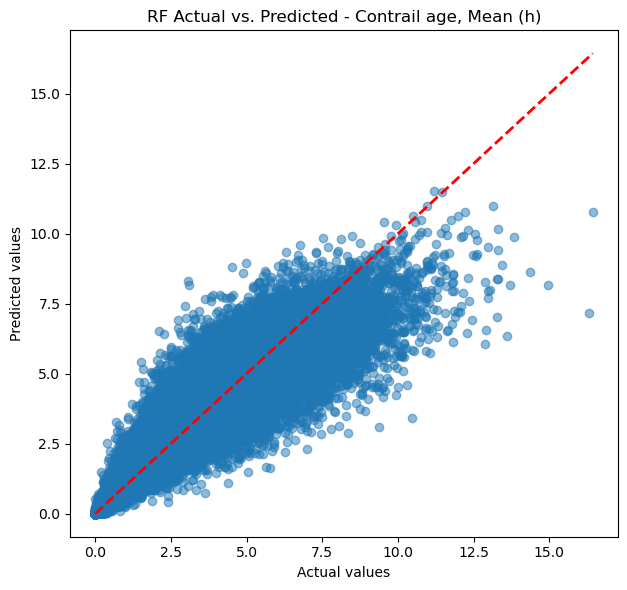

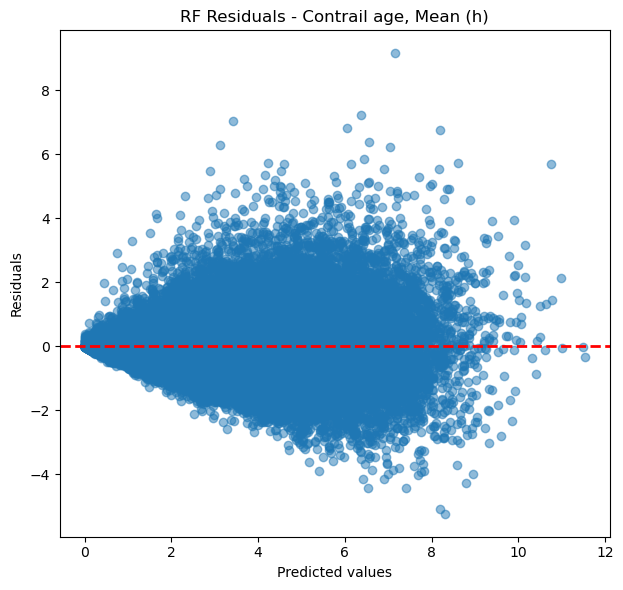

In [54]:
# 1. scatterplots of actual vs. predicted values - w added terms
plt.figure(figsize=(12, 6))

# # For 'Persistent contrail length (km)'
# plt.subplot(1, 2, 1)
# plt.scatter(y1_val, y1_pred_rf, alpha=0.5)
# plt.plot([min(y1_val), max(y1_val)], [min(y1_val), max(y1_val)], '--', lw=2, color='red')
# plt.title("RF Actual vs. Predicted - Persistent contrail length (km)")
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")

# For 'Contrail age, Mean (h)'
plt.subplot(1, 2, 2)
plt.scatter(y2_val, y2_pred_rf_lr, alpha=0.5)
plt.plot([min(y2_val), max(y2_val)], [min(y2_val), max(y2_val)], '--', lw=2, color='red')
plt.title("RF Actual vs. Predicted - Contrail age, Mean (h)")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.tight_layout()
plt.show()

# 2. residualplots
plt.figure(figsize=(12, 6))

# # For 'Persistent contrail length (km)'
# plt.subplot(1, 2, 1)
# residuals1_rf = y1_val - y1_pred_rf
# plt.scatter(y1_pred_rf, residuals1_rf, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--', lw=2)
# plt.title("RF Residuals - Persistent contrail length (km)")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")

# For 'Contrail age, Mean (h)'
plt.subplot(1, 2, 2)
residuals2_rf_lr = y2_val - y2_pred_rf_lr
plt.scatter(y2_pred_rf_lr, residuals2_rf_lr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("RF Residuals - Contrail age, Mean (h)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

## xgboost

In [29]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c1/cf/a662bc8f40588d54663edfe12980946670490bff0b6e793c7896a4fe36df/xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.6 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [44]:
#Gradient boosting improved over LR wo added terms - slightly BETTER results
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_reg.fit(X_train_scaled, y2_train)
y2_pred_xgb = xgb_reg.predict(X_val_scaled)

mse2_xgb = mean_squared_error(y2_val, y2_pred_xgb)
r2_2_xgb = r2_score(y2_val, y2_pred_xgb)
print(f"XGBoost Metrics for 'Contrail age, Mean (h)': MSE = {mse2_xgb}, R2 = {r2_2_xgb}")

XGBoost Metrics for 'Contrail age, Mean (h)': MSE = 0.5134233455506092, R2 = 0.9050287735624951


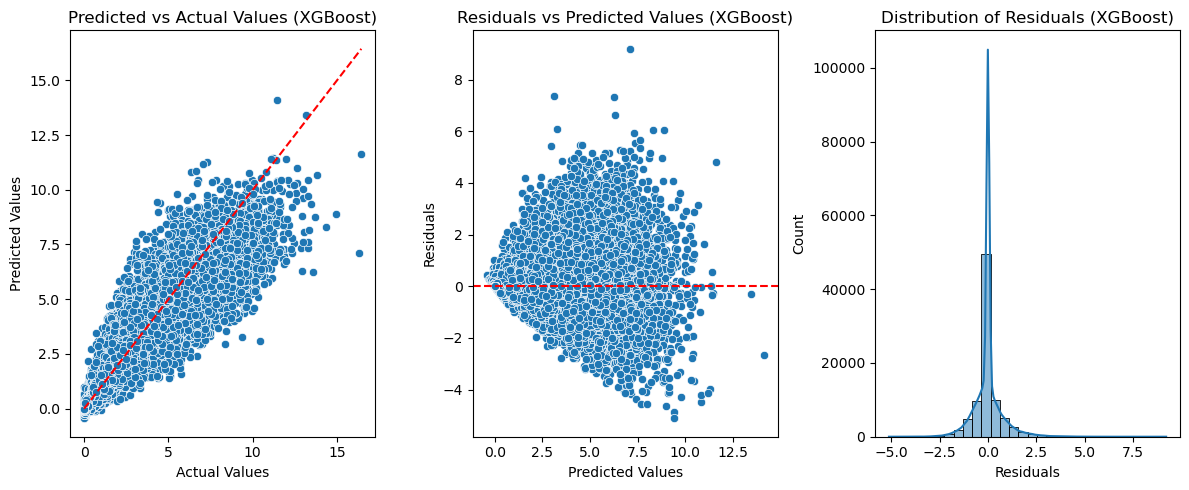

In [45]:
#evaluation wo added terms

residuals_xgb = y2_val - y2_pred_xgb
plt.figure(figsize=(12, 5))

#predicted vs actual
plt.subplot(1, 3, 1)
sns.scatterplot(x=y2_val, y=y2_pred_xgb)
plt.plot([min(y2_val), max(y2_val)], [min(y2_val), max(y2_val)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (XGBoost)')

#residuals vs predicted
plt.subplot(1, 3, 2)
sns.scatterplot(x=y2_pred_xgb, y=residuals_xgb)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (XGBoost)')

#residual dist
plt.subplot(1, 3, 3)
sns.histplot(residuals_xgb, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (XGBoost)')

plt.tight_layout()
plt.show()

In [43]:
#Gradient boosting improved over LR w added terms
import xgboost as xgb

xgb_reg_lr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_reg_lr.fit(X_train_scaled_lr, y2_train)
y2_pred_xgb_lr = xgb_reg_lr.predict(X_val_scaled_lr)

mse2_xgb_lr = mean_squared_error(y2_val, y2_pred_xgb_lr)
r2_2_xgb_lr = r2_score(y2_val, y2_pred_xgb_lr)
print(f"XGBoost Metrics for 'Contrail age, Mean (h)': MSE = {mse2_xgb_lr}, R2 = {r2_2_xgb_lr}")

XGBoost Metrics for 'Contrail age, Mean (h)': MSE = 0.51673025014496, R2 = 0.9044170740989647


## FFNN

In [33]:
!pip install keras 

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fe/58/34d4d8f1aa11120c2d36d7ad27d0526164b1a8ae45990a2fede31d0e59bf/keras-2.14.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [35]:
! pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e2/7a/c7762c698fb1ac41a7e3afee51dc72aa3ec74ae8d2f57ce19a9cded3a4af/tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata
  Obtaining dependency information for ml-dtypes==0.2.0 from https://files.pythonhosted.org/p

In [37]:
from keras.models import Sequential
from keras.layers import Dense

#wo added terms
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled, y2_train, epochs=5, batch_size=10, validation_data=(X_val_scaled, y2_val))

y2_pred_nn = model.predict(X_val_scaled)

mse2_nn = mean_squared_error(y2_val, y2_pred_nn)
r2_2_nn = r2_score(y2_val, y2_pred_nn)
print(f"Neural Network Metrics for 'Contrail age, Mean (h)': MSE = {mse2_nn}, R2 = {r2_2_nn}")

Epoch 1/5
34846/34846 [==============================] - 52s 1ms/step - loss: 0.7453 - val_loss: 0.6492
Epoch 2/5
34846/34846 [==============================] - 52s 1ms/step - loss: 0.6224 - val_loss: 0.6018
Epoch 3/5
34846/34846 [==============================] - 52s 1ms/step - loss: 0.5964 - val_loss: 0.5854
Epoch 4/5
34846/34846 [==============================] - 52s 1ms/step - loss: 0.5856 - val_loss: 0.6026
Epoch 5/5
2723/2723 [==============================] - 3s 938us/step
Neural Network Metrics for 'Contrail age, Mean (h)': MSE = 0.573213289015853, R2 = 0.8939690422340848


In [52]:
#w added terms
model2 = Sequential()
model2.add(Dense(128, input_dim=X_train_scaled_lr.shape[1], activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train_scaled_lr, y2_train, epochs=5, batch_size=10, validation_data=(X_val_scaled_lr, y2_val))

y2_pred_nn2 = model2.predict(X_val_scaled_lr)

mse2_nn2 = mean_squared_error(y2_val, y2_pred_nn2)
r2_2_nn2 = r2_score(y2_val, y2_pred_nn2)
print(f"Neural Network Metrics for 'Contrail age, Mean (h)': MSE = {mse2_nn2}, R2 = {r2_2_nn2}")

Epoch 1/5
34846/34846 [==============================] - 53s 2ms/step - loss: 0.7421 - val_loss: 0.6151
Epoch 2/5
34846/34846 [==============================] - 53s 2ms/step - loss: 0.6233 - val_loss: 0.5812
Epoch 3/5
34846/34846 [==============================] - 53s 2ms/step - loss: 0.5998 - val_loss: 0.5640
Epoch 4/5
34846/34846 [==============================] - 53s 2ms/step - loss: 0.5864 - val_loss: 0.5740
Epoch 5/5
2723/2723 [==============================] - 3s 962us/step
Neural Network Metrics for 'Contrail age, Mean (h)': MSE = 0.546796071955839, R2 = 0.898855605194257


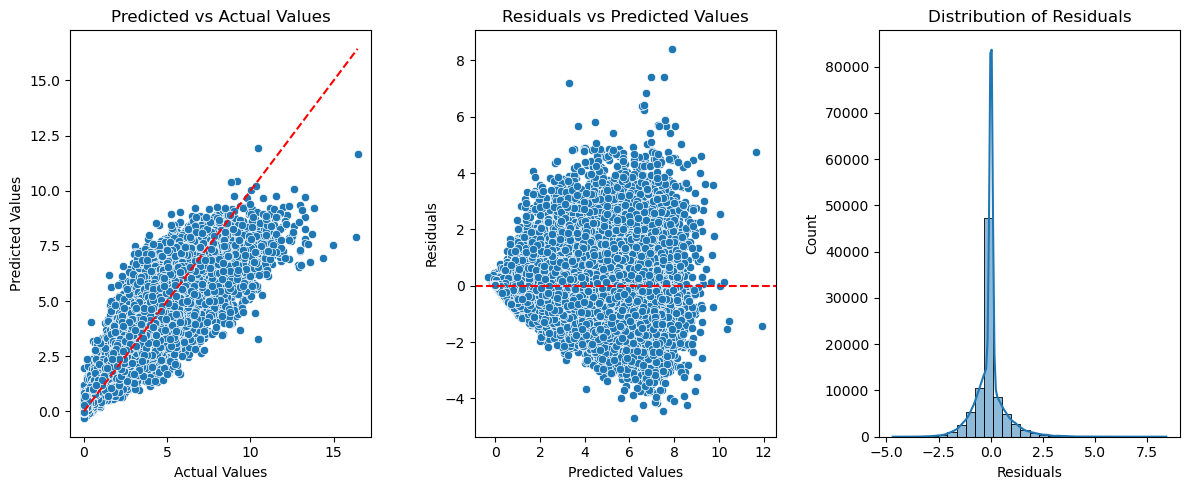

In [53]:
#evaluation - w added terms
import seaborn as sns

residuals = y2_val - y2_pred_nn2.ravel()
plt.figure(figsize=(12, 5))

#predicted vs actual
plt.subplot(1, 3, 1)
sns.scatterplot(x=y2_val, y=y2_pred_nn2.ravel())
plt.plot([min(y2_val), max(y2_val)], [min(y2_val), max(y2_val)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')

#residuals vs predicted
plt.subplot(1, 3, 2)
sns.scatterplot(x=y2_pred_nn2.ravel(), y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

#residuals dist
plt.subplot(1, 3, 3)
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()